# Model Building Using Text Analysis

In [31]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set_style("whitegrid")
sns.set_context("poster")
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
#critics = pd.read_csv('comments1_with_sentimentsoriginal.csv')
critics = pd.read_csv('comments1_with_sentimentsoriginal.csv')
critics = critics.dropna(subset=['body', 'Answer1']) 
#let's drop rows with missing quotes
critics['positive'] = critics['Answer1'] >= 0
critics.head()

,Unnamed: 0,index,body,company,date,score,Worker1,Answer1,Avg,Date,positive
0,3L21G7IH4773YI2L6RV6T5G4RTC1YW,1199,"I shall do that! I was thinking ""I've had this...",Fitbit,1449270750,3,A2R0YYUAWNT7UD,2,2,2015-12-05 06:58:53 UTC,True
1,3I7KR83SNAOQ3IGZ6P98Z3JCRQR9KI,1178,Love it. Has helped keep me on track for weigh...,Fitbit,1449265917,2,A1NM7ZPZ3NH412,2,2,2015-12-05 06:59:05 UTC,True
2,3P7RGTLO6EO481Q4YVN8VYUWX89KA8,1174,I love it because I do not have to stop and pu...,Fitbit,1449251995,2,A3ITZNJQUTIZ4C,2,2,2015-12-05 07:02:17 UTC,True
3,373L46LKP7HF9UT8S10LOXXFNV3KJO,409,"I never wore a watch, now I wear an Apple Watc...",Apple,1449290608,1,A2R0YYUAWNT7UD,2,2,2015-12-05 06:59:32 UTC,True
4,3G9UA71JVV5REFMO97BCKSSTHB2J7G,1465,"The fallout soundtracks are great, but IMO the...",Spotify,1449249457,1,A1FP3SH704X01V,2,2,2015-12-05 06:59:41 UTC,True


In [33]:
critics['Answer1'] = critics['Answer1'].apply(int)

In [34]:
from pattern.vector import stem, PORTER, LEMMA
punctuation = r'[.,;:!?]'
import re
def num_sentence(body):
    return len(re.split(punctuation, body))
def num_word(sentence):
    return len(re.split(" ", sentence))

num_word = critics.body.apply(num_word)
num_sentence = critics.body.apply(num_sentence)
critics['num_word'] = num_word
critics['num_sentence'] = num_sentence
critics.head()



,Unnamed: 0,index,body,company,date,score,Worker1,Answer1,Avg,Date,positive,num_word,num_sentence
0,3L21G7IH4773YI2L6RV6T5G4RTC1YW,1199,"I shall do that! I was thinking ""I've had this...",Fitbit,1449270750,3,A2R0YYUAWNT7UD,2,2,2015-12-05 06:58:53 UTC,True,65,12
1,3I7KR83SNAOQ3IGZ6P98Z3JCRQR9KI,1178,Love it. Has helped keep me on track for weigh...,Fitbit,1449265917,2,A1NM7ZPZ3NH412,2,2,2015-12-05 06:59:05 UTC,True,11,3
2,3P7RGTLO6EO481Q4YVN8VYUWX89KA8,1174,I love it because I do not have to stop and pu...,Fitbit,1449251995,2,A3ITZNJQUTIZ4C,2,2,2015-12-05 07:02:17 UTC,True,17,1
3,373L46LKP7HF9UT8S10LOXXFNV3KJO,409,"I never wore a watch, now I wear an Apple Watc...",Apple,1449290608,1,A2R0YYUAWNT7UD,2,2,2015-12-05 06:59:32 UTC,True,22,3
4,3G9UA71JVV5REFMO97BCKSSTHB2J7G,1465,"The fallout soundtracks are great, but IMO the...",Spotify,1449249457,1,A1FP3SH704X01V,2,2,2015-12-05 06:59:41 UTC,True,26,5


In [35]:
grp = critics.groupby('company')

(array([   65.,     0.,   606.,     0.,     0.,  2264.,     0.,   459.,
            0.,    37.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <a list of 10 Patch objects>)

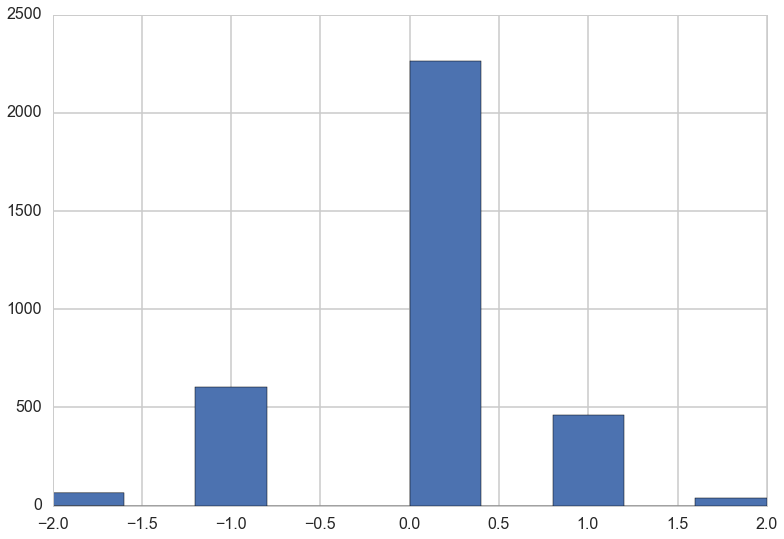

In [36]:
plt.hist(critics['Answer1'])

(array([  3.41500000e+03,   5.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  -71. ,   309.7,   690.4,  1071.1,  1451.8,  1832.5,  2213.2,
         2593.9,  2974.6,  3355.3,  3736. ]),
 <a list of 10 Patch objects>)

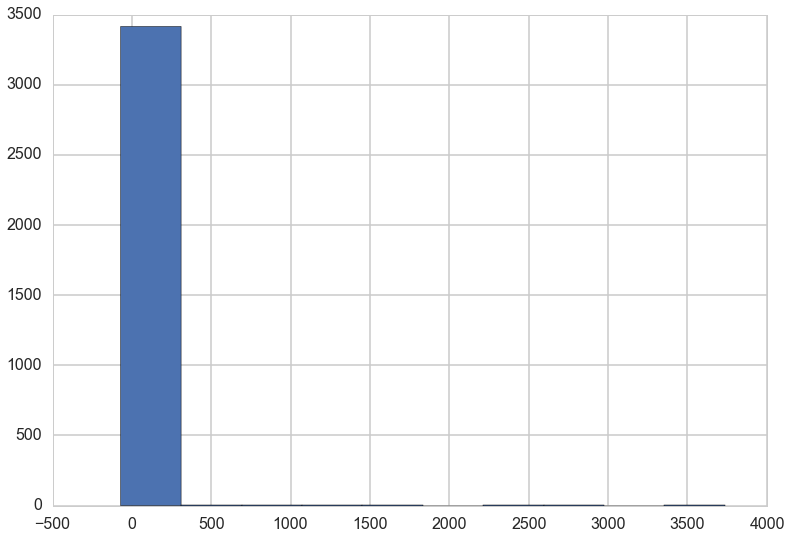

In [37]:
plt.hist(critics['score'])

# Validation Tools

In [38]:
def make_xy(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer(encoding = 'latin-1', strip_accents = 'ascii', stop_words='english')
    X = vectorizer.fit_transform(critics.body)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (critics.Answer1).values.astype(np.int)
    return X, y


def make_xyBinary(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer(encoding = 'latin-1', strip_accents = 'ascii', stop_words='english')
    X = vectorizer.fit_transform(critics.body)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (critics.positive).values.astype(np.int)
    return X, y
X, y = make_xy(critics)
Xbin, ybin = make_xyBinary(critics)

In [39]:

#train/test split the data
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
xbintrain, xbintest, ybintrain, ybintest = train_test_split(Xbin, ybin)

In [40]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [41]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y < 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [42]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(critics.shape[0]), train_size=0.7)
mask=np.ones(critics.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

# Model Building Time

## ROC curve

In [43]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

## MultiNomial Naive Bayes

In [44]:
#Multinomial Naive Bayes
clf = MultinomialNB()
clf = clf.fit(xtrain, ytrain)
training_accuracy = clf.score(xtrain, ytrain)
print "Naive Bayes"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

clfbin = MultinomialNB()
clfbin = clfbin.fit(xbintrain, ybintrain)
training_accuracy = clfbin.score(xbintrain, ybintrain)
print "Naive Bayes Binary"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "MN Accuracy: %0.2f%%" % (100 * clfbin.score(xbintest, ybintest))

Naive Bayes
Accuracy on training data: 0.86
MN Accuracy: 59.09%
Naive Bayes Binary
Accuracy on training data: 0.93
MN Accuracy: 75.76%


In [45]:
def validation(clf, binary= False):
    alphas = [0, .1, 1, 5, 10, 50]
    min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

    #Find the best value for alpha and min_df, and the best classifier
    best_alpha = None
    best_min_df = None
    maxscore=-np.inf
    for alpha in alphas:
        for min_df in min_dfs:         
            vectorizer = CountVectorizer(min_df = min_df, encoding = 'latin-1')
            if not binary:
                Xthis, ythis = make_xy(critics, vectorizer)
            else:
                Xthis, ythis = make_xyBinary(critics,vectorizer)
            Xtrainthis=Xthis[mask]
            ytrainthis=ythis[mask]
            #your code here
            clf = MultinomialNB(alpha=alpha)
            cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

            if cvscore > maxscore:
                maxscore = cvscore
                best_alpha, best_min_df = alpha, min_df
    return best_alpha, best_min_df
best_alpha1, best_min_df1 = validation(clf)
best_alpha2, best_min_df2 = validation(clf, binary = True)

In [46]:
vectorizer = CountVectorizer(min_df=best_min_df1, encoding = 'latin-1')
X1, y1 = make_xy(critics, vectorizer)
xtrain1=X1[mask]
ytrain1=y1[mask]
xtest1=X1[~mask]
ytest1=y1[~mask]

best_clf = MultinomialNB(alpha=best_alpha1).fit(xtrain1, ytrain1)

vectorizerbin = CountVectorizer(min_df=best_min_df2, encoding='latin-1')
Xbin, ybin = make_xyBinary(critics, vectorizer)
xbintrain1=Xbin[mask]
ybintrain1=ybin[mask]
xbintest1=Xbin[~mask]
ybintest1=ybin[~mask]

best_clfbin = MultinomialNB(alpha=best_alpha2).fit(xbintrain1, ybintrain1)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = best_clf.score(xtrain1, ytrain1)
test_accuracy = best_clf.score(xtest1, ytest1)

print "Parameter Optimized Naive Bayes"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

training_accuracybin = best_clfbin.score(xbintrain1, ybintrain1)
test_accuracybin = best_clfbin.score(xbintest1, ybintest1)

print "Parameter Optimized Naive Bayes Binary"
print "Accuracy on training data: %0.2f" % (training_accuracybin)
print "Accuracy on test data:     %0.2f" % (test_accuracybin)

Parameter Optimized Naive Bayes
Accuracy on training data: 0.67
Accuracy on test data:     0.64
Parameter Optimized Naive Bayes Binary
Accuracy on training data: 0.81
Accuracy on test data:     0.78


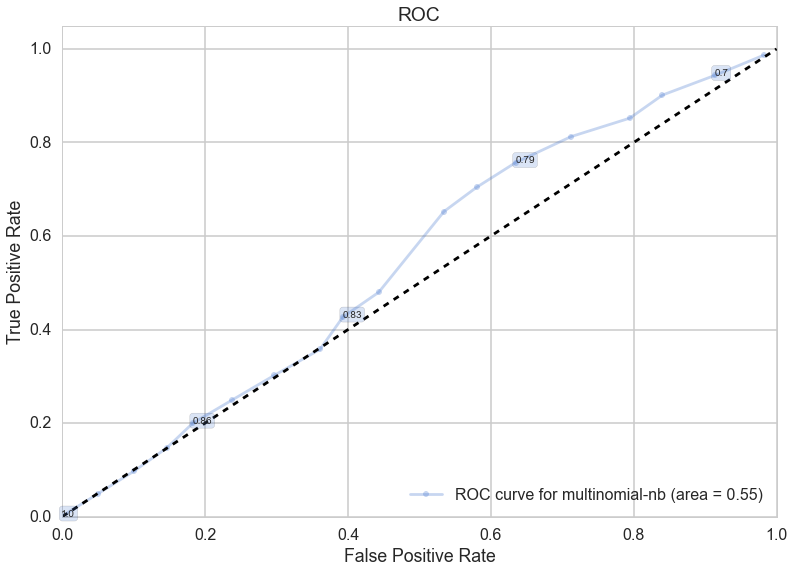

In [47]:
with sns.color_palette(palette="muted"):
    make_roc("multinomial-nb", best_clfbin, ybintest1, xbintest1, labe=200, skip=50)

## Random Forest

In [48]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, n_jobs=-1, class_weight = 'auto').fit(xtrain,ytrain)
rf_train_accuracy = rf.score(xtrain, ytrain)
print "Random Forest with Ranges"
print "Accuracy on training data: %0.2f" % (rf_train_accuracy)
print "RF Accuracy: %.02f%%" % (100*rf.score(xtest,ytest))

rfbin = RandomForestClassifier(n_estimators=100, min_samples_split=2, n_jobs= -1, class_weight = 'auto').fit(xbintrain,ybintrain)
rfbin_train_accuracy = rfbin.score(xbintrain, ybintrain)
print "Random Forest Binary Data"
print "Accuracy on training data: %0.2f" % (rfbin_train_accuracy)
print "RF Accuracy: %.02f%%" % (100*rfbin.score(xbintest,ybintest))

Random Forest with Ranges
Accuracy on training data: 1.00
RF Accuracy: 66.43%
Random Forest Binary Data
Accuracy on training data: 1.00
RF Accuracy: 78.32%


In [50]:
n_ests = [10, 20, 50, 100, 150, 200]
min_dfs = [0,.1,.01,.001,.0001,1]
max_depths = [5,10,15,20,25,40,50,70,80,90]

#Find the best value for alpha and min_df, and the best classifier
best_n_est = 10
# n_est = range(best_n_est-5, best_n_est+5)
# min_dfs = range(int(best_min_df), int(best_min_df+5.))
# max_depths = range(max_depth-5, max_depth+5)

# best_n_est = n_est[0]
maxscore=-np.inf
for max_depth in max_depths:
    for n_est in n_ests:  
        for min_df in min_dfs:
            vectorizer = CountVectorizer(min_df = min_df, encoding = 'latin-1')       
            Xthis, ythis = make_xy(critics, vectorizer)
            Xtrainthis=Xthis[mask]
            ytrainthis=ythis[mask]
            #your code here
            rf = RandomForestClassifier(n_estimators=n_est,max_depth = max_depth, min_samples_split=2, class_weight = 'auto', n_jobs=-1)
            cvscore = cv_score(rf, Xtrainthis, ytrainthis, log_likelihood)

            if cvscore > maxscore:
                maxscore = cvscore
                best_n_est, best_min_df, best_max_depth = n_est, min_df, max_depth
                
maxscore_bin=-np.inf
for max_depth in max_depths:
    for n_est in n_ests:  
        for min_df in min_dfs:
            vectorizer = CountVectorizer(min_df = min_df, encoding = 'latin-1')       
            Xthis_bin, ythis_bin = make_xyBinary(critics, vectorizer)
            Xtrainthis_bin=Xthis_bin[mask]
            ytrainthis_bin=ythis_bin[mask]
            #your code here
            rfbin = RandomForestClassifier(n_estimators=n_est,max_depth = max_depth, min_samples_split=2, class_weight = 'auto', n_jobs=-1)
            cvscore = cv_score(rfbin, Xtrainthis, ytrainthis, log_likelihood)

            if cvscore > maxscore_bin:
                maxscore_bin = cvscore
                best_n_est_bin, best_min_df_bin, best_max_depth_bin = n_est, min_df, max_depth

In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df, encoding = 'latin-1')
X2, y2 = make_xy(critics, vectorizer)
xtrain2=X2[mask]
ytrain2=y2[mask]
xtest2=X2[~mask]
ytest2=y2[~mask]

best_rf = RandomForestClassifier(n_estimators=best_n_est, max_depth=best_max_depth, min_samples_split=2, n_jobs=-1, class_weight= 'auto').fit(xtrain2,ytrain2)
rf_train_accuracy = best_rf.score(xtrain2, ytrain2)
rf_test_accuracy = best_rf.score(xtest2, ytest2)

print "Random Forest with Ranges"
print "Accuracy on training data: %0.2f" % (rf_train_accuracy)
print "Accuracy on test %0.2f" % (rf_test_accuracy)

vectorizerbin = CountVectorizer(min_df=best_min_df_bin)
Xbin2, ybin2 = make_xyBinary(critics, vectorizer)
xbintrain2=Xbin2[mask]
ybintrain2=ybin2[mask]
xbintest2=Xbin[~mask]
ybintest2=ybin[~mask]

best_rfbin = RandomForestClassifier(n_estimators=best_n_est_bin, max_depth=best_max_depth_bin, min_samples_split=2, n_jobs=-1, class_weight= 'auto').fit(xbintrain2,ybintrain2)
rfbin_train_accuracy = best_rfbin.score(xbintrain2, ybintrain2)
rfbin_test_accuracy = best_rfbin.score(xbintest2, ybintest2)

print "Random Forest Binary Data"
print "Accuracy on training data: %0.2f" % (rfbin_train_accuracy)
print "RF Accuracy: %.02f%%" % (rfbin_test_accuracy)

In [ ]:
with sns.color_palette(palette="muted"):
    make_roc("random-forest", best_rfbin, ybintest2, xbintest2, labe=200, skip=50)

## Logistic Regression

In [ ]:
#Logistic Regression
logistic = LogisticRegression(penalty = 'l1', class_weight = 'auto')
logistic = logistic.fit(xbintrain, ybintrain)
log_train_accuracy = logistic.score(xbintrain,ybintrain)
print "Logistic Regression"
print "Accuracy on training data: %0.2f" % (log_train_accuracy)
print "Logistic Accuracy: %.02f%%" % (100*logistic.score(xbintest,ybintest))

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
min_dfs = [ 1e-4, 1e-3, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for c in Cs:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)
        Xthis, ythis = make_xyBinary(critics,vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        logistic = LogisticRegression(penalty = 'l1', C=c, class_weight='auto')
        cvscore = cv_score(logistic, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_c, best_min_df = c, min_df

In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df, encoding= 'latin-1')
X3, y3 = make_xyBinary(critics, vectorizer)
xbintrain3=X3[mask]
ybintrain3=y3[mask]
xbintest3=X3[~mask]
ybintest3=y3[~mask]

best_log = LogisticRegression(penalty = 'l1', C=best_c, class_weight='auto').fit(xbintrain3,ybintrain3)
log_train_accuracy = best_log.score(xbintrain3, ybintrain3)
log_test_accuracy = best_log.score(xbintest3, ybintest3)

print "Optimized Logistic Regression Parameters"
print "Accuracy on training data: %0.2f" % (log_train_accuracy)
print "Accuracy on test %0.2f" % (log_test_accuracy)

In [ ]:
with sns.color_palette(palette="muted"):
    make_roc("logistic", best_log, ybintest3, xbintest3, labe=200, skip=50)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
clfsvm = SVC(kernel='linear', class_weight='auto').fit(xtrain, ytrain)
svm_accuracy=clfsvm.score(xtest, ytest)
print "Support Vector Machine"
print "Accuracy on training data: %0.2f" % (svm_accuracy)
print "Logistic Accuracy: %.02f%%" % (100*clfsvm.score(xtest,ytest))

In [ ]:
Cs = [.001,.01, .1, 1, 10, 100]
min_dfs = [ 1e-4, 1e-3, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for c in Cs:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df, encoding = 'latin-1')
        Xthis, ythis = make_xyBinary(critics,vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        svm = SVC(kernel='linear', C=c, class_weight='auto', probability=True)
        cvscore = cv_score(svm, Xtrainthis, ytrainthis, log_likelihood)
        if cvscore > maxscore:
            maxscore = cvscore
            best_c, best_min_df = c, min_df

In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df)
Xbin4, ybin4 = make_xyBinary(critics, vectorizer)
xbintrain4=Xbin4[mask]
ybintrain4=ybin4[mask]
xbintest4=Xbin4[~mask]
ybintest4=ybin4[~mask]

best_svm = SVC(kernel='linear', C=best_c, class_weight ='auto').fit(xbintrain4,ybintrain4)
svm_train_accuracy = best_svm.score(xbintrain4, ybintrain4)
svm_test_accuracy = best_svm.score(xbintest4, ybintest4)

print "Optimized SVM Parameters"
print "Accuracy on training data: %0.2f" % (svm_train_accuracy)
print "Accuracy on test %0.2f" % (svm_test_accuracy)

In [ ]:
with sns.color_palette(palette="muted"):
    make_roc("linear-svm", best_svm, ybintest4, xbintest4, proba=False, labe=200, skip=50)

## ROC curve comparison of all models

In [ ]:
with sns.color_palette(palette="muted"):
    roc_plot = make_roc("multinomial-nb", best_clfbin, ybintest1, xbintest1, labe=200, skip=50)
    make_roc("random-forest", best_rfbin, ybintest2, xbintest2, labe=200, ax=roc_plot, skip=50)
    make_roc("logistic", best_log, ybintest3, xbintest3, labe=200, ax=roc_plot, skip=50)
    make_roc("linear-svm", best_svm, ybintest4, xbintest4, proba=False, labe=200, ax=roc_plot, skip=50)

# Visualization of the Results

In [ ]:
def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(Fresh)")
    
    #the distribution of P(fresh)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(Fresh)")
    plt.ylabel("Number")

In [ ]:
calibration_plot(logistic, xbintest, ybintest)

In [ ]:
calibration_plot(clfbin, xbintest, ybintest)

In [ ]:
calibration_plot(rfbin, xbintest, ybintest)

#NLTK Sentiment with Naive Bayes Classifier

In [ ]:
reddit = []
for row in range(len(critics.body)):
    words = critics.iloc[row].body.split()
    temp = (words, critics.iloc[row].Answer1)
    reddit.append(temp)

    

In [ ]:
#http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/
import nltk
def get_words(reddits):
    all_words = []
    for (a, b) in reddits:
        all_words.extend(a)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features


In [ ]:
word_features = get_word_features(get_words(reddit))
#print word_features

In [ ]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [ ]:
#extract_features(reddit[1])
training_set = nltk.classify.apply_features(extract_features, reddit)

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print 'accuracy:', nltk.classify.util.accuracy(classifier, training_set)
classifier.show_most_informative_features()

#Final Predictions

In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xyBinary(critics, vectorizer)

In [ ]:
prediction = logistic.predict(Xbin)
critics['prediction_binary'] = prediction


In [ ]:
critics['prediction'] = prediction*critics['score']

In [ ]:
company = critics.groupby('company').agg({'prediction':np.mean})
company2 = critics.groupby('company').agg({'prediction_binary':np.mean})

In [ ]:
grp = critics.groupby('company')

In [ ]:
names = []
for a,b in grp:
    names.append(a)

In [ ]:
values = []
for i in company.values:
    values.append(i[0])
values2 = []
for i in company2.values:
    values2.append(i[0])

In [ ]:
final = pd.DataFrame()
final['weighted_predict'] = values
final['name'] = names
final['predict_binary'] = values2

In [ ]:
final.head()

In [ ]:
final.to_csv("company_with_predictions_binary_no_hierarchy.csv")

#Predictions with Categories

In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(critics, vectorizer)

In [ ]:
prediction = best_rf.predict(X)

In [ ]:
critics['prediction_range_range'] = prediction


In [ ]:
critics['prediction_range'] = prediction*critics['score']

In [ ]:
company_range = critics.groupby('company').agg({'prediction_range':np.mean})

In [ ]:
weight_values = []
for i in company_range.values:
    weight_values.append(i[0])

In [ ]:
final_weight = pd.DataFrame()
final_weight['weighted_predict_range'] = weight_values
final_weight['name'] = names

In [ ]:
final_weight.to_csv("company_with_prediction_range_no_hierarchy.csv")

#Second Model Using Text Characteristics

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [ ]:
ols_model = ols('Answer1 ~prediction_range_range + num_word:num_sentence + num_word ', critics).fit()
ols_model.summary()

In [ ]:
y = ols_model.predict(critics)

In [ ]:
critics['prediction_range'] = y*critics['score']
critics['range'] = y

company_range = critics.groupby('company').agg({'prediction_range':np.mean})
company_range2 = critics.groupby('company').agg({'range':np.mean})

weight_values = []
for i in company_range.values:
    weight_values.append(i[0])
    
weight = []
for i in company_range2.values:
    weight.append(i[0])
final_weight = pd.DataFrame()

final_weight['weighted_predict_range'] = weight_values
final_weight['name'] = names
final_weight['predict_range'] = weight

final_weight.to_csv("company_with_prediction_range_multimodel.csv")

In [1]:
ols_model = ols('Answer1 ~prediction+ num_word:num_sentence + num_word ', critics).fit()
ols_model.summary()

NameError: name 'ols' is not defined